In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv('/kaggle/input/new-dataset/cleaned_data2.csv')


In [3]:
data_e = pd.get_dummies(df, columns=['Day_Of_Week'], drop_first=True, dtype=int)

data_e['Day_Of_Week_Monday'] = data_e['Day_Of_Week_Monday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Saturday'] = data_e['Day_Of_Week_Saturday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Sunday'] = data_e['Day_Of_Week_Sunday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Thursday'] = data_e['Day_Of_Week_Thursday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Tuesday'] = data_e['Day_Of_Week_Tuesday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Wednesday'] = data_e['Day_Of_Week_Wednesday'].replace({True: 1, False: 0}).infer_objects()



In [4]:
data_e['Date'] = pd.to_datetime(data_e['Date'])

# Extract the day of the month
data_e['Day'] = data_e['Date'].dt.day

data_e.columns

Index(['Date', 'Year', 'Month', 'WeekStatus', 'NSM', 'Load_Type',
       'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'CO2(tCO2)', 'Usage_kWh', 'Hour',
       'Day_Of_Week_Monday', 'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday',
       'Day_Of_Week_Thursday', 'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday',
       'Day'],
      dtype='object')

In [5]:
data_e = data_e.drop(columns=['Date'])

In [6]:
def rearrange_columns(df, new_order):
    return df[new_order]

new_order = ['Year', 'Month','Day','Hour', 'NSM','WeekStatus', 'Load_Type',
       'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'CO2(tCO2)', 'Usage_kWh', 
       'Day_Of_Week_Monday', 'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday',
       'Day_Of_Week_Thursday', 'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday']

data_e = rearrange_columns(data_e, new_order)
data_e.head(10)

,Year,Month,Day,Hour,NSM,WeekStatus,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,2018,1,1,0,900,1,0,2.95,0.0,73.21,100.0,0.0,3.17,1,0,0,0,0,0
1,2018,1,1,0,1800,1,0,4.46,0.0,66.77,100.0,0.0,4.00,1,0,0,0,0,0
2,2018,1,1,0,2700,1,0,3.28,0.0,70.28,100.0,0.0,3.24,1,0,0,0,0,0
3,2018,1,1,1,3600,1,0,3.56,0.0,68.09,100.0,0.0,3.31,1,0,0,0,0,0
4,2018,1,1,1,4500,1,0,4.50,0.0,64.72,100.0,0.0,3.82,1,0,0,0,0,0
5,2018,1,1,1,5400,1,0,3.56,0.0,67.76,100.0,0.0,3.28,1,0,0,0,0,0
6,2018,1,1,1,6300,1,0,4.14,0.0,65.62,100.0,0.0,3.60,1,0,0,0,0,0
7,2018,1,1,2,7200,1,0,4.28,0.0,64.37,100.0,0.0,3.60,1,0,0,0,0,0
8,2018,1,1,2,8100,1,0,3.64,0.0,66.94,100.0,0.0,3.28,1,0,0,0,0,0
9,2018,1,1,2,9000,1,0,4.72,0.0,62.51,100.0,0.0,3.78,1,0,0,0,0,0


In [7]:
data_e.to_csv("final_data.csv", index=False) 
d = pd.read_csv('/kaggle/working/final_data.csv')
d.columns
d.info()
d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  35041 non-null  int64  
 1   Month                                 35041 non-null  int64  
 2   Day                                   35041 non-null  int64  
 3   Hour                                  35041 non-null  int64  
 4   NSM                                   35041 non-null  int64  
 5   WeekStatus                            35041 non-null  int64  
 6   Load_Type                             35041 non-null  int64  
 7   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 8   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 9   Lagging_Current_Power_Factor          35041 non-null  float64
 10  Leading_Current_Power_Factor          35041 non-null  float64
 11  CO2(tCO2)      

,Year,Month,Day,Hour,NSM,WeekStatus,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,2018,1,1,0,900,1,0,2.95,0.00,73.21,100.00,0.0,3.17,1,0,0,0,0,0
1,2018,1,1,0,1800,1,0,4.46,0.00,66.77,100.00,0.0,4.00,1,0,0,0,0,0
2,2018,1,1,0,2700,1,0,3.28,0.00,70.28,100.00,0.0,3.24,1,0,0,0,0,0
3,2018,1,1,1,3600,1,0,3.56,0.00,68.09,100.00,0.0,3.31,1,0,0,0,0,0
4,2018,1,1,1,4500,1,0,4.50,0.00,64.72,100.00,0.0,3.82,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2018,12,31,23,83700,1,0,3.74,0.00,70.71,100.00,0.0,3.74,1,0,0,0,0,0
35037,2018,12,31,23,84600,1,0,3.17,0.07,76.62,99.98,0.0,3.78,1,0,0,0,0,0
35038,2018,12,31,23,85500,1,0,3.06,0.11,77.72,99.96,0.0,3.78,1,0,0,0,0,0
35039,2018,12,31,0,0,1,0,3.02,0.07,77.22,99.98,0.0,3.67,1,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
# Splitting Data
X = d.drop(columns=['Usage_kWh'])
y = d['Usage_kWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate Linear Regression
print(f'Linear Regression MAE: {mean_absolute_error(y_test, lr_predictions):.2f}')
print(f'Linear Regression MSE: {mean_squared_error(y_test, lr_predictions):.2f}')
print(f'Linear Regression R² Score: {r2_score(y_test, lr_predictions):.2f}')
X_train.columns

Linear Regression MAE: 2.58
Linear Regression MSE: 17.93
Linear Regression R² Score: 0.98


Index(['Year', 'Month', 'Day', 'Hour', 'NSM', 'WeekStatus', 'Load_Type',
       'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'CO2(tCO2)', 'Day_Of_Week_Monday',
       'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday', 'Day_Of_Week_Thursday',
       'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday'],
      dtype='object')

                                 Feature   Importance
11                             CO2(tCO2)  1645.329413
16                   Day_Of_Week_Tuesday     0.708432
6                              Load_Type     0.625017
7   Lagging_Current_Reactive.Power_kVarh     0.324521
3                                   Hour     0.224922
1                                  Month     0.128107
9           Lagging_Current_Power_Factor     0.124602
17                 Day_Of_Week_Wednesday     0.079326
8   Leading_Current_Reactive_Power_kVarh     0.075349
15                  Day_Of_Week_Thursday     0.066649
13                  Day_Of_Week_Saturday     0.065713
10          Leading_Current_Power_Factor     0.060408
14                    Day_Of_Week_Sunday     0.034625
2                                    Day     0.033226
5                             WeekStatus     0.031089
12                    Day_Of_Week_Monday     0.002583
4                                    NSM     0.000057
0                           

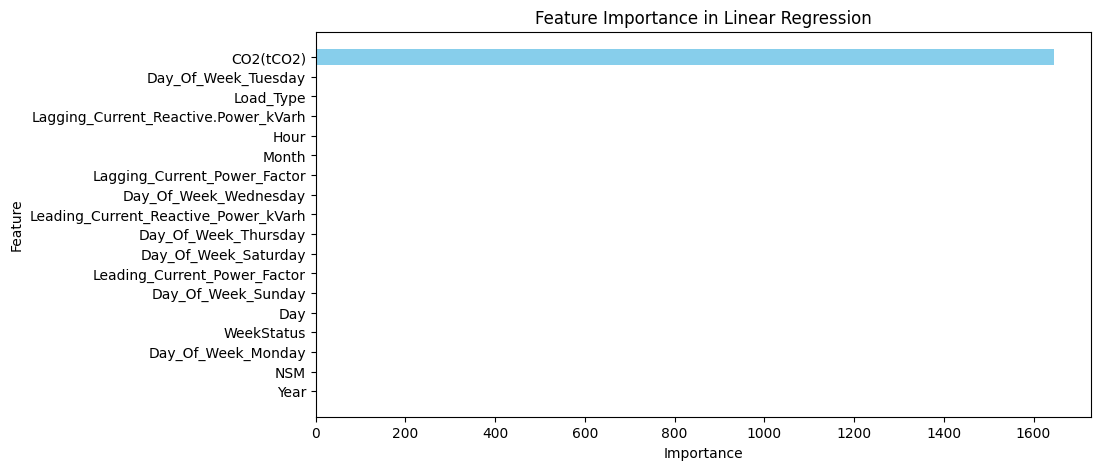

In [11]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': np.abs(lr_model.coef_)})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()


Linear Regression MAE: 6.99
Linear Regression MSE: 97.30
Linear Regression R² Score: 0.91
                                 Feature  Importance
6                              Load_Type    3.268130
7   Lagging_Current_Reactive.Power_kVarh    1.441073
3                                   Hour    0.940159
9           Lagging_Current_Power_Factor    0.627768
16                 Day_Of_Week_Wednesday    0.475839
15                   Day_Of_Week_Tuesday    0.466481
5                             WeekStatus    0.455383
1                                  Month    0.411660
13                    Day_Of_Week_Sunday    0.334867
10          Leading_Current_Power_Factor    0.295076
12                  Day_Of_Week_Saturday    0.120516
11                    Day_Of_Week_Monday    0.066813
8   Leading_Current_Reactive_Power_kVarh    0.050034
2                                    Day    0.041707
14                  Day_Of_Week_Thursday    0.018945
4                                    NSM    0.000218
0        

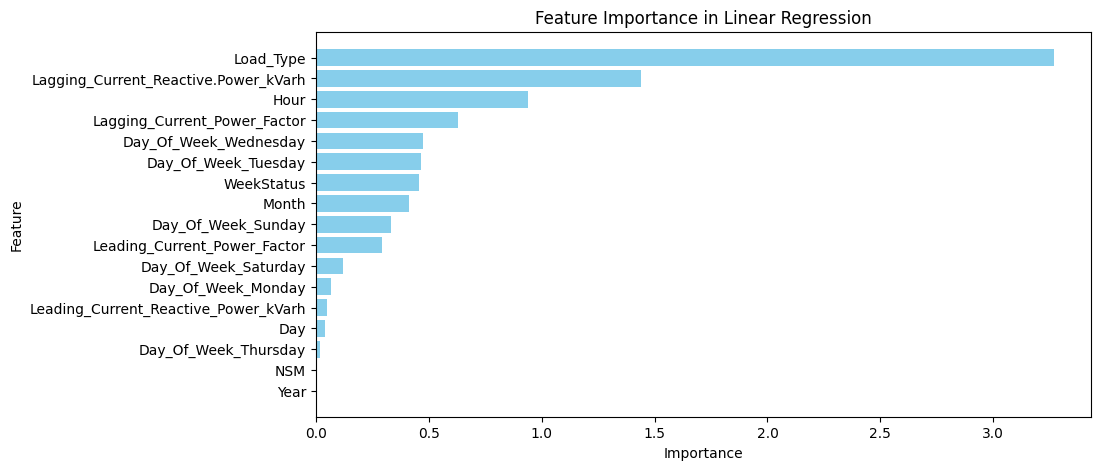

In [12]:
""" WITHOUT COE EMISSION"""


# Splitting Data without co2
X1 = d.drop(columns=['Usage_kWh', 'CO2(tCO2)'])
y1 = d['Usage_kWh']
z1 = d['CO2(tCO2)']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X1_train, y1_train)

# Make Predictions
lr_predictions1 = lr_model.predict(X1_test)

# Evaluate Linear Regression
print(f'Linear Regression MAE: {mean_absolute_error(y1_test, lr_predictions1):.2f}')
print(f'Linear Regression MSE: {mean_squared_error(y1_test, lr_predictions1):.2f}')
print(f'Linear Regression R² Score: {r2_score(y1_test, lr_predictions1):.2f}')
X1_train.columns


feature_importance = pd.DataFrame({'Feature': X1_train.columns, 
                                   'Importance': np.abs(lr_model.coef_)})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()


In [13]:
X1_train['LR_Prediction'] = lr_model.predict(X1_train)
X1_test['LR_Prediction'] = lr_model.predict(X1_test)

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X1_train, y1_train)

# Make Predictions
xgb_predictions = xgb_model.predict(X1_test)

# Evaluate XGBoost
print(f'XGBoost Hybrid Model MAE: {mean_absolute_error(y_test, xgb_predictions):.2f}')
print(f'XGBoost Hybrid Model MSE: {mean_squared_error(y_test, xgb_predictions):.2f}')
print(f'XGBoost Hybrid Model R² Score: {r2_score(y_test, xgb_predictions):.2f}')



XGBoost Hybrid Model MAE: 0.70
XGBoost Hybrid Model MSE: 1.76
XGBoost Hybrid Model R² Score: 1.00


                                 Feature  Importance
17                         LR_Prediction    0.933470
9           Lagging_Current_Power_Factor    0.037923
10          Leading_Current_Power_Factor    0.006523
6                              Load_Type    0.005516
7   Lagging_Current_Reactive.Power_kVarh    0.004843
8   Leading_Current_Reactive_Power_kVarh    0.002583
1                                  Month    0.002534
13                    Day_Of_Week_Sunday    0.002066
4                                    NSM    0.001640
3                                   Hour    0.001067
5                             WeekStatus    0.000557
2                                    Day    0.000497
15                   Day_Of_Week_Tuesday    0.000216
11                    Day_Of_Week_Monday    0.000174
14                  Day_Of_Week_Thursday    0.000166
16                 Day_Of_Week_Wednesday    0.000139
12                  Day_Of_Week_Saturday    0.000084
0                                   Year    0.

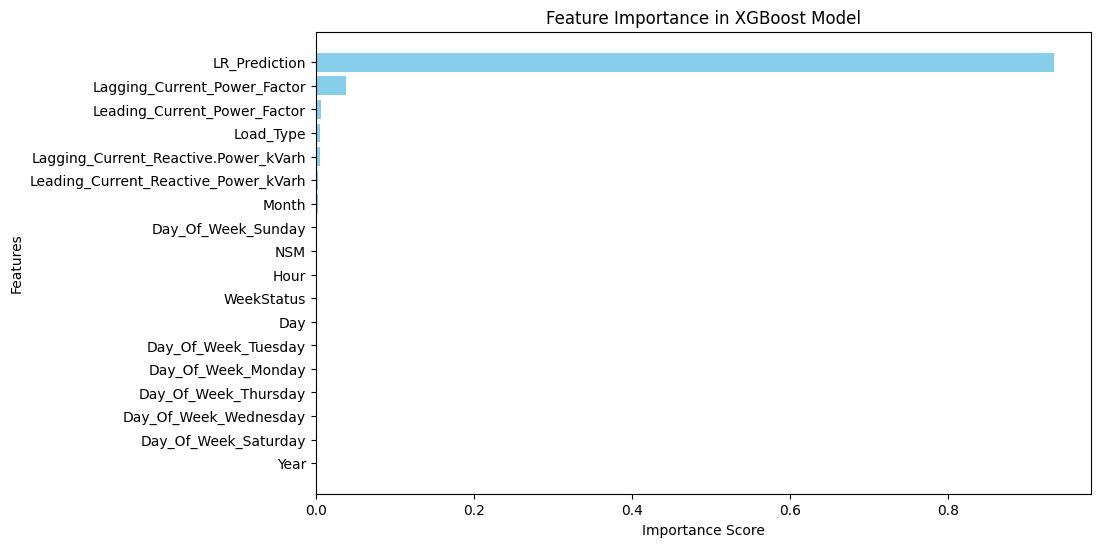

In [14]:
feature_importance = xgb_model.feature_importances_

# Get feature names from your dataset
feature_names = X1_train.columns 

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)



# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [15]:
d

,Year,Month,Day,Hour,NSM,WeekStatus,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday
0,2018,1,1,0,900,1,0,2.95,0.00,73.21,100.00,0.0,3.17,1,0,0,0,0,0
1,2018,1,1,0,1800,1,0,4.46,0.00,66.77,100.00,0.0,4.00,1,0,0,0,0,0
2,2018,1,1,0,2700,1,0,3.28,0.00,70.28,100.00,0.0,3.24,1,0,0,0,0,0
3,2018,1,1,1,3600,1,0,3.56,0.00,68.09,100.00,0.0,3.31,1,0,0,0,0,0
4,2018,1,1,1,4500,1,0,4.50,0.00,64.72,100.00,0.0,3.82,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2018,12,31,23,83700,1,0,3.74,0.00,70.71,100.00,0.0,3.74,1,0,0,0,0,0
35037,2018,12,31,23,84600,1,0,3.17,0.07,76.62,99.98,0.0,3.78,1,0,0,0,0,0
35038,2018,12,31,23,85500,1,0,3.06,0.11,77.72,99.96,0.0,3.78,1,0,0,0,0,0
35039,2018,12,31,0,0,1,0,3.02,0.07,77.22,99.98,0.0,3.67,1,0,0,0,0,0


In [28]:
"""predicting multiple outputs ['Lagging_Current_Reactive.Power_kVarh', 
'Leading_Current_Reactive_Power_kVarh', 
       'Lagging_Current_Power_Factor', 
       'Leading_Current_Power_Factor']"""

X2 = d[[  'Month', 'WeekStatus', 'NSM', 'Load_Type','Hour', 'Day_Of_Week_Monday', 'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday',
       'Day_Of_Week_Thursday', 'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday', ]]
Y2 = d[['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor',]]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [29]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [30]:
# Define the multi-output XGBoost model
multi_output_model = MultiOutputRegressor(XGBRegressor(n_estimators=700, learning_rate=0.2, random_state=42))

# Train the model
multi_output_model.fit(X2_train, Y2_train)

# Make predictions
Y2_pred = multi_output_model.predict(X2_test)

# Evaluate performance
mae = mean_absolute_error(Y2_test, Y2_pred, multioutput='raw_values')
mse = mean_squared_error(Y2_test, Y2_pred, multioutput='raw_values')
r2 = r2_score(Y2_test, Y2_pred, multioutput='raw_values')

# Print evaluation metrics for each predicted feature
print("Mean Absolute Error (MAE) for each target variable:", mae)
print("Mean Squared Error (MSE) for each target variable:", mse)
print("R² Score for each target variable:", r2)

Mean Absolute Error (MAE) for each target variable: [5.32412215 1.3230311  3.84035971 4.39057766]
Mean Squared Error (MSE) for each target variable: [ 87.25183701  11.37152603  41.58306238 162.20794225]
R² Score for each target variable: [0.6779868  0.78939889 0.88316719 0.82314571]


In [32]:
joblib.dump(multi_output_model, "multi_output_model.pkl")

['multi_output_model.pkl']

In [20]:
""" 
FINAL MODELLING 
"""

#feature selection
X3 = d[[  'Month', 'WeekStatus', 'Load_Type','Hour', 'Day_Of_Week_Monday', 'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday',
       'Day_Of_Week_Thursday', 'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday', 
       'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', ]]
y3 = d['Usage_kWh']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X3_train, y3_train)

# Make Predictions
lr_predictions3 = lr_model.predict(X3_test)

# Evaluate Linear Regression
print(f'Linear Regression MAE: {mean_absolute_error(y3_test, lr_predictions3):.2f}')
print(f'Linear Regression MSE: {mean_squared_error(y3_test, lr_predictions3):.2f}')
print(f'Linear Regression R² Score: {r2_score(y3_test, lr_predictions3):.2f}')
X1_train.columns

Linear Regression MAE: 6.99
Linear Regression MSE: 97.51
Linear Regression R² Score: 0.91


Index(['Year', 'Month', 'Day', 'Hour', 'NSM', 'WeekStatus', 'Load_Type',
       'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'Day_Of_Week_Monday',
       'Day_Of_Week_Saturday', 'Day_Of_Week_Sunday', 'Day_Of_Week_Thursday',
       'Day_Of_Week_Tuesday', 'Day_Of_Week_Wednesday', 'LR_Prediction'],
      dtype='object')

                                 Feature  Importance
2                              Load_Type    3.267616
10  Lagging_Current_Reactive.Power_kVarh    1.441429
12          Lagging_Current_Power_Factor    0.626934
8                    Day_Of_Week_Tuesday    0.470127
1                             WeekStatus    0.462169
9                  Day_Of_Week_Wednesday    0.459860
0                                  Month    0.413323
6                     Day_Of_Week_Sunday    0.341754
13          Leading_Current_Power_Factor    0.295959
3                                   Hour    0.154250
5                   Day_Of_Week_Saturday    0.120414
4                     Day_Of_Week_Monday    0.075612
11  Leading_Current_Reactive_Power_kVarh    0.055611
7                   Day_Of_Week_Thursday    0.004787


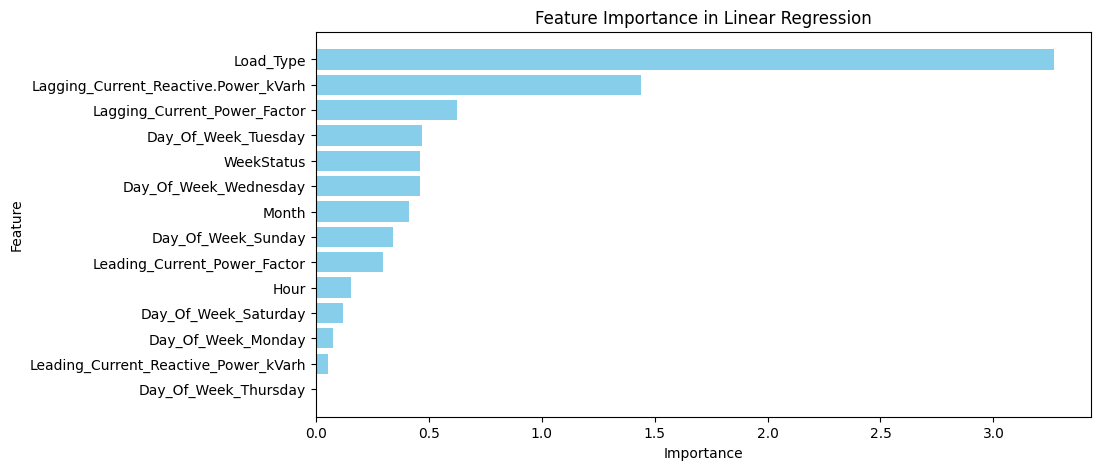

In [21]:
feature_importance = pd.DataFrame({'Feature': X3_train.columns, 
                                   'Importance': np.abs(lr_model.coef_)})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [22]:
""" RANDOM FOREST"""

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X3_train, y3_train)

# Make Predictions
y3_pred = rf_model.predict(X3_test)

# Evaluate the Model
mae = mean_absolute_error(y3_test, y3_pred)
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print(f'Random Forest MAE: {mae:.2f}')
print(f'Random Forest MSE: {mse:.2f}')
print(f'Random Forest R² Score: {r2:.2f}')

Random Forest MAE: 0.26
Random Forest MSE: 0.58
Random Forest R² Score: 1.00


In [23]:
#checking overfitting- 

train_preds = rf_model.predict(X3_train)
test_preds = rf_model.predict(X3_test)

# Evaluate Performance
def evaluate(y_true, y_pred, dataset_name):
    print(f"{dataset_name} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{dataset_name} MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{dataset_name} R² Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 40)

evaluate(y3_train, train_preds, "Train")
evaluate(y3_test, test_preds, "Test")

Train MAE: 0.09
Train MSE: 0.10
Train R² Score: 1.00
----------------------------------------
Test MAE: 0.26
Test MSE: 0.58
Test R² Score: 1.00
----------------------------------------


In [24]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X3_train, y3_train, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.2f}")

Cross-Validation R² Scores: [0.99936703 0.99889008 0.99946519 0.99931924 0.99933499]
Mean R² Score: 1.00


In [25]:
joblib.dump(rf_model, "energy_estimation.pkl")

['energy_estimation.pkl']

In [26]:
#co2 emmision model

X_co2 = d[['Usage_kWh','Load_Type']]
y_co2 = d['CO2(tCO2)']

X_co2_train, X_co2_test, y_co2_train, y_co2_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

lr_co2 = LinearRegression()

lr_co2.fit(X_co2_train, y_co2_train)

pred = lr_co2.predict(X_co2_test)

print(f'Linear Regression MAE: {mean_absolute_error(y_co2_test, pred):.2f}')
print(f'Linear Regression MSE: {mean_squared_error(y_co2_test, pred):.2f}')
print(f'Linear Regression R² Score: {r2_score(y_co2_test, pred):.2f}')


Linear Regression MAE: 0.00
Linear Regression MSE: 0.00
Linear Regression R² Score: 0.98


In [27]:
joblib.dump(lr_co2, 'co2_emission_prediction.pkl')

['co2_emission_prediction.pkl']